# Main



Now some text explaining stuff

## General requirements

In [1]:
from matplotlib.pylab import *
from numpy import *
%matplotlib inline

In [2]:
from Nanorods.sub.subs import *

In [3]:
import PIL
import PIL.ExifTags as Exiftags

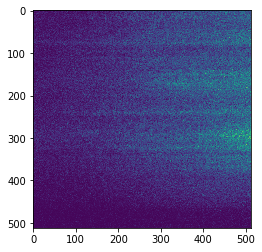

In [33]:
fname = "C:\\Users\ludwig\Documents\Python data\cell1_BeRST.tif"
img = PIL.Image.open(fname)
imshow(img)

In [40]:
img = PIL.Image.open(fname)
#imshow(img)
imf = img.tag_v2
keys = []
for i,key in enumerate(imf.keys()):
    if i < 8:
        print(key,imf[key])
    keys.append(key)
offset = 50839


256 1024
257 512
258 (16,)
262 1
270 ImageJ=1.52i
images=6000
frames=6000
unit=micron
finterval=0.010014000000000002
loop=false
min=300.0
max=19463.0

273 (6517240,)
277 1
278 512


In [95]:
int(imf[270].split()[1][7:])

'200'

In [48]:
def readBigTifFile(fname):
    img = PIL.Image.open(fname)
    imf = img.tag_v2
    keys = []
    for key in imf.keys():
        keys.append(key)

    width, height = imf[keys[0]],imf[keys[1]]
    nframes = int(imf[270].split()[1][7:])
    size = nframes*width*height
    
    offset = imf[273][0]
    print(offset)
    with open(fname,"rb") as file:
        file.seek(offset)
        temp = fromfile(file,dtype=">u2")

    temp = temp[:size].reshape((nframes,height,width))
    return(temp)

6517240


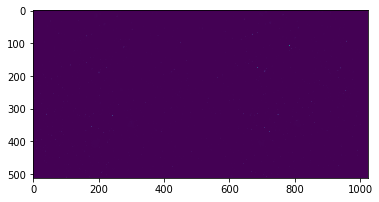

In [49]:
fname = "C:\\Users\ludwig\Documents\Python data\cell1_BeRST.tif"
movie = readBigTifFile(fname)
movie = movie.sum(axis=0)

(<Figure size 504x324 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff873889c50>)

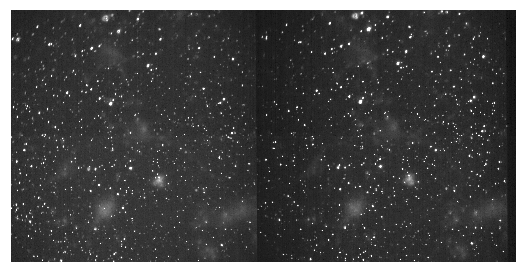

In [54]:
visualization(movie)

##     Mask generation and three fields alignment.

### cMOS camera fields alignment
### EMCCD mask generation
### Transposition of mask two CMOS images


##   Local maxima detection and ROI detection
### Local maxima detection
### Blinking coefficient and selection
### Neural-net?


##   Processing ROIs:
### Linearization of ROI
### Blinking substraction
### Stitching cycles
### Mobility



##    Extracting Signal
### FT score calculation
### Interval extraction



##   Bootstrap?

